# NFL Passing Success

## Business Problem

In today's NFL game, much has been made of the pass and the quarterback position. So much so that quarterbacks were taken with the first three picks in the 2021 NFL Draft. This is due to a varity of factors, including explosive college offensive schemes working their way into the NFL. But despite the new focus on the passing game, an increase in passing efficiency hasn't follwed. In the following project, we will take a look at passing results and tendancies for offenses and defenses to determine the best passing conditions.

### Data Used

- Two Kaggle datasets from the NFL's 2021 Big Data Bowl that showed details of each matchup and the details of every passing play for the 2018 season
- Three tables from the website Pro-Football-Reference.com that showed statistics for passing offenses and defenses for the 2018 season

## Preprocessing

In this section, we will import the intial passing plays dataset, join the supporting datasets, drop useless rows and columns, and feature engineer new columns based on the data we already have.

In [1]:
# Import basic libraries and initial passing plays dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

play_df = pd.read_csv('data/plays.csv')

play_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [2]:
#Import the games dataset
game_df = pd.read_csv('data/games.csv')
game_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [3]:
#Observe the play and game datasets to find a common column
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [4]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           253 non-null    int64 
 1   gameDate         253 non-null    object
 2   gameTimeEastern  253 non-null    object
 3   homeTeamAbbr     253 non-null    object
 4   visitorTeamAbbr  253 non-null    object
 5   week             253 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 12.0+ KB


We are going to merge the two datasets using the gameId column.

In [5]:
#Merge the two datasets together
play_df = play_df.merge(game_df, on='gameId', how='right')
play_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,passResult,offensePlayResult,playResult,epa,isDefensivePI,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,C,10,10,0.261827,False,09/06/2018,20:20:00,PHI,ATL,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,I,0,0,-0.372360,False,09/06/2018,20:20:00,PHI,ATL,1
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,I,0,0,-0.702779,False,09/06/2018,20:20:00,PHI,ATL,1
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,C,33,33,3.047530,False,09/06/2018,20:20:00,PHI,ATL,1
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,I,0,0,-0.842272,False,09/06/2018,20:20:00,PHI,ATL,1


In [6]:
#Double check that the columns combined correctly
list(play_df)

['gameId',
 'playId',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'possessionTeam',
 'playType',
 'yardlineSide',
 'yardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInTheBox',
 'numberOfPassRushers',
 'personnelD',
 'typeDropback',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'gameClock',
 'absoluteYardlineNumber',
 'penaltyCodes',
 'penaltyJerseyNumbers',
 'passResult',
 'offensePlayResult',
 'playResult',
 'epa',
 'isDefensivePI',
 'gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'week']

Going forward, we will want our gameId column to be unique so we will be changing this column to a string. We will also be renaming the possessionTeam to offteam, which is short of offense team. A defense team column will be added later.

In [7]:
play_df['gameId'] = play_df['gameId'].map(str)

In [8]:
play_df.rename({'possessionTeam': 'offteam'}, axis='columns', inplace=True)

In [9]:
play_df['offteam'].value_counts()

PIT    738
GB     705
TB     693
IND    686
ATL    668
PHI    662
NYG    644
DET    640
CLE    634
MIN    622
LA     619
OAK    617
NE     615
BAL    607
CAR    604
DAL    602
CIN    599
JAX    598
DEN    598
KC     595
HOU    590
WAS    570
SF     567
NYJ    566
ARI    556
NO     555
BUF    553
CHI    545
MIA    527
LAC    506
TEN    496
SEA    462
Name: offteam, dtype: int64

Since there are two NFL teams in Los Angeles, the official abbreviation for the LA Rams is LAR. We will fix that issue now.

In [10]:
play_df['offteam'] = play_df['offteam'].replace(['LA'], 'LAR')

Now, it's time to add a defense team column. We can do that by creating a variable with an if loop using the home and visitor team columns.

In [11]:
def defteam(i):
    if i['offteam'] != i['homeTeamAbbr']:
        return i['homeTeamAbbr']
    else:
        return i['visitorTeamAbbr']

Next, let's apply that variable to the dataset and create a new column.

In [12]:
play_df['defteam'] = play_df.apply(defteam, axis=1)
play_df['defteam'].value_counts()

LA     927
CLE    681
CHI    677
HOU    651
NE     648
NO     645
BAL    642
ATL    642
CIN    636
NYJ    635
PIT    628
PHI    626
KC     609
NYG    608
WAS    603
DAL    595
IND    594
TB     587
TEN    582
CAR    580
DEN    572
MIA    561
DET    558
JAX    553
GB     549
BUF    548
ARI    536
LAC    533
SF     528
SEA    521
OAK    510
MIN    474
Name: defteam, dtype: int64

Now that we have joined the two Kaggle datasets, let's move on to importing the Pro-Football-Reference.com datasets. We will start with the pass defense table.

In [13]:
#Import the csv file that was downloaded from the website
passdef_df = pd.read_csv('data/pass_def.csv')
passdef_df.head()

,Tm,G,Att,Cmp,Yds,TD,DADOT,Air,YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,Atlanta Falcons,16,585,398,4153,33,8.5,2448,1968,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112
1,Buffalo Bills,16,492,313,2867,22,7.6,1804,1584,128,23.40%,76,13.90%,41,8.30%,36,153,28.00%,137
2,Carolina Panthers,16,529,353,3847,32,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104
3,Chicago Bears,16,615,377,3515,22,8.6,2195,1802,140,20.30%,93,13.50%,41,6.70%,50,184,26.70%,81
4,Cincinnati Bengals,16,584,389,4414,32,8.8,2410,2088,121,18.90%,75,11.70%,42,7.20%,34,151,23.60%,104


For this dataset, we have a column where the full team name is identified, but we need to add the abbreviation. Again, we can do that by defining a variable with an if loop.

In [14]:
def defteam(i):
    if i['Tm'] == 'Atlanta Falcons':
        return 'ATL'
    elif i['Tm'] == 'Buffalo Bills':
        return 'BUF'
    elif i['Tm'] == 'Carolina Panthers':
        return 'CAR'
    elif i['Tm'] == 'Chicago Bears':
        return 'CHI'
    elif i['Tm'] == 'Cincinnati Bengals':
        return 'CIN'
    elif i['Tm'] == 'Cleveland Browns':
        return 'CLE'
    elif i['Tm'] == 'Indianapolis Colts':
        return 'IND'
    elif i['Tm'] == 'Arizona Cardinals':
        return 'ARI'
    elif i['Tm'] == 'Dallas Cowboys':
        return 'DAL'
    elif i['Tm'] == 'Denver Broncos':
        return 'DEN'
    elif i['Tm'] == 'Detroit Lions':
        return 'DET'
    elif i['Tm'] == 'Green Bay Packers':
        return 'GB'
    elif i['Tm'] == 'Houston Texans':
        return 'HOU'
    elif i['Tm'] == 'Jacksonville Jaguars':
        return 'JAX'
    elif i['Tm'] == 'Kansas City Chiefs':
        return 'KC'
    elif i['Tm'] == 'Miami Dolphins':
        return 'MIA'
    elif i['Tm'] == 'Minnesota Vikings':
        return 'MIN'
    elif i['Tm'] == 'New Orleans Saints':
        return 'NO'
    elif i['Tm'] == 'New England Patriots':
        return 'NE'
    elif i['Tm'] == 'New York Giants':
        return 'NYG'
    elif i['Tm'] == 'New York Jets':
        return 'NYJ'
    elif i['Tm'] == 'Tennessee Titans':
        return 'TEN'
    elif i['Tm'] == 'Philadelphia Eagles':
        return 'PHI'
    elif i['Tm'] == 'Pittsburgh Steelers':
        return 'PIT'
    elif i['Tm'] == 'Oakland Raiders':
        return 'OAK'
    elif i['Tm'] == 'Los Angeles Rams':
        return 'LAR'
    elif i['Tm'] == 'Baltimore Ravens':
        return 'BAL'
    elif i['Tm'] == 'Los Angeles Chargers':
        return 'LAC'
    elif i['Tm'] == 'Seattle Seahawks':
        return 'SEA'
    elif i['Tm'] == 'San Francisco 49ers':
        return 'SF'
    elif i['Tm'] == 'Tampa Bay Buccaneers':
        return 'TB'
    elif i['Tm'] == 'Washington Redskins':
        return 'WAS'
    else:
        return

Now, lets apply the variable to the dataset.

In [15]:
passdef_df['defteam'] = passdef_df.apply(defteam, axis=1)
passdef_df['defteam'].head(32)

0     ATL
1     BUF
2     CAR
3     CHI
4     CIN
5     CLE
6     IND
7     ARI
8     DAL
9     DEN
10    DET
11     GB
12    HOU
13    JAX
14     KC
15    MIA
16    MIN
17     NO
18     NE
19    NYG
20    NYJ
21    TEN
22    PHI
23    PIT
24    OAK
25    LAR
26    BAL
27    LAC
28    SEA
29     SF
30     TB
31    WAS
Name: defteam, dtype: object

You'll notice that some of the stats deal with season totals on game totals, completions allowed, attempts by the opposing team, passing yards, and passing touchdowns. While this data is unique and useful when analyzing a team, we are just looking for tendancies. So these columns can be dropped.

In [16]:
#Drop useless columns
passdef_df = passdef_df.drop(['G', 'Att', 'Cmp', 'Yds', 'TD'], axis=1)
passdef_df.head()

,Tm,DADOT,Air,YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl,defteam
0,Atlanta Falcons,8.5,2448,1968,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112,ATL
1,Buffalo Bills,7.6,1804,1584,128,23.40%,76,13.90%,41,8.30%,36,153,28.00%,137,BUF
2,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,CAR
3,Chicago Bears,8.6,2195,1802,140,20.30%,93,13.50%,41,6.70%,50,184,26.70%,81,CHI
4,Cincinnati Bengals,8.8,2410,2088,121,18.90%,75,11.70%,42,7.20%,34,151,23.60%,104,CIN


Now, we can merge the datasets using the defteam column.

In [17]:
play_df = play_df.merge(passdef_df, on='defteam', how='right')
play_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,offteam,playType,yardlineSide,yardlineNumber,...,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,2018090600,320.0,(10:10) (Shotgun) N.Foles pass short left to N...,1.0,2.0,8.0,PHI,play_type_pass,PHI,4.0,...,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112
1,2018090600,344.0,(9:24) (Shotgun) N.Foles pass incomplete short...,1.0,3.0,4.0,PHI,play_type_pass,PHI,8.0,...,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112
2,2018090600,752.0,(3:46) (Shotgun) N.Foles pass short left to N....,1.0,2.0,4.0,PHI,play_type_pass,PHI,37.0,...,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112
3,2018090600,776.0,(3:06) (Shotgun) N.Foles sacked at PHI 36 for ...,1.0,1.0,10.0,PHI,play_type_sack,PHI,43.0,...,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112
4,2018090600,839.0,(1:21) (Shotgun) N.Foles FUMBLES (Aborted) at ...,1.0,3.0,12.0,PHI,play_type_sack,PHI,41.0,...,139,21.50%,70,10.80%,30,5.10%,37,137,21.20%,112


In [18]:
#Double check that the columns merged successfully
list(play_df)

['gameId',
 'playId',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'offteam',
 'playType',
 'yardlineSide',
 'yardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInTheBox',
 'numberOfPassRushers',
 'personnelD',
 'typeDropback',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'gameClock',
 'absoluteYardlineNumber',
 'penaltyCodes',
 'penaltyJerseyNumbers',
 'passResult',
 'offensePlayResult',
 'playResult',
 'epa',
 'isDefensivePI',
 'gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'week',
 'defteam',
 'Tm',
 'DADOT',
 'Air',
 'YAC',
 'Bltz',
 'Bltz%',
 'Hrry',
 'Hrry%',
 'QBKD',
 'QBKD%',
 'Sk',
 'Prss',
 'Prss%',
 'MTkl']

Next, we'll move on to the offensive datasets. We'll begin by importing the air offense dataset.

In [19]:
#Import dataset and check the first five rows
off_df = pd.read_csv('data/air_offense.csv')
off_df.head()

,Tm,G,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp
0,Atlanta Falcons,16,428,617,4653,5279,8.6,2804,6.6,4.5,1849,4.3
1,Buffalo Bills,16,271,499,2794,4942,9.9,1693,6.2,3.4,1101,4.1
2,Carolina Panthers,16,378,563,3836,4169,7.4,2022,5.3,3.6,1814,4.8
3,Chicago Bears,16,344,512,3564,4479,8.7,2151,6.3,4.2,1413,4.1
4,Cincinnati Bengals,16,331,542,3290,4278,7.9,1919,5.8,3.5,1371,4.1


Now let's import the accuracy offense data set.

In [20]:
#Import dataset and check the first five rows again
accuracy_df = pd.read_csv('data/accuracy_offense.csv')
accuracy_df.head()

,Tm,G,Cmp,Att,Yds,Bats,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,OnTgt,OnTgt%
0,Atlanta Falcons,16,428,617,4653,0,18,1,37,6.20%,81,13.50%,0,0.00%
1,Buffalo Bills,16,271,499,2794,0,21,0,24,5.00%,110,23.00%,0,0.00%
2,Carolina Panthers,16,378,563,3836,0,21,4,24,4.50%,85,15.80%,0,0.00%
3,Chicago Bears,16,344,512,3564,0,10,1,13,2.60%,90,18.00%,0,0.00%
4,Cincinnati Bengals,16,331,542,3290,0,14,3,30,5.70%,93,17.70%,0,0.00%


Notice that the season totals are duplicates. These must be dropped from one dataset before we merge to avoid duplicates.

In [21]:
#Drop totals from accuracy dataset
accuracy_df = accuracy_df.drop(['G', 'Cmp', 'Att', 'Yds'], axis=1)
accuracy_df.head()

,Tm,Bats,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,OnTgt,OnTgt%
0,Atlanta Falcons,0,18,1,37,6.20%,81,13.50%,0,0.00%
1,Buffalo Bills,0,21,0,24,5.00%,110,23.00%,0,0.00%
2,Carolina Panthers,0,21,4,24,4.50%,85,15.80%,0,0.00%
3,Chicago Bears,0,10,1,13,2.60%,90,18.00%,0,0.00%
4,Cincinnati Bengals,0,14,3,30,5.70%,93,17.70%,0,0.00%


Now, lets merge the datasets.

In [22]:
off_df = off_df.merge(accuracy_df, on='Tm', how='right')
off_df.head()

,Tm,G,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,...,YAC/Cmp,Bats,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,OnTgt,OnTgt%
0,Atlanta Falcons,16,428,617,4653,5279,8.6,2804,6.6,4.5,...,4.3,0,18,1,37,6.20%,81,13.50%,0,0.00%
1,Buffalo Bills,16,271,499,2794,4942,9.9,1693,6.2,3.4,...,4.1,0,21,0,24,5.00%,110,23.00%,0,0.00%
2,Carolina Panthers,16,378,563,3836,4169,7.4,2022,5.3,3.6,...,4.8,0,21,4,24,4.50%,85,15.80%,0,0.00%
3,Chicago Bears,16,344,512,3564,4479,8.7,2151,6.3,4.2,...,4.1,0,10,1,13,2.60%,90,18.00%,0,0.00%
4,Cincinnati Bengals,16,331,542,3290,4278,7.9,1919,5.8,3.5,...,4.1,0,14,3,30,5.70%,93,17.70%,0,0.00%


The first five rows of three columns show all zeroes. Let's see if there are any other unique values.

In [23]:
print(off_df['OnTgt'].value_counts())
print(off_df['OnTgt%'].value_counts())
print(off_df['Bats'].value_counts())

0    32
Name: OnTgt, dtype: int64
0.00%    32
Name: OnTgt%, dtype: int64
0    32
Name: Bats, dtype: int64


Since there are just zeroes, these columns don't add anything so they can be dropped.

In [24]:
off_df = off_df.drop(['OnTgt', 'OnTgt%', 'Bats'], axis=1)

In order to join this dataset to our main one, there must be a common column. We will create an offense team column for the offensive dataset so it can be merged.

In [25]:
def offteam(i):
    if i['Tm'] == 'Atlanta Falcons':
        return 'ATL'
    elif i['Tm'] == 'Buffalo Bills':
        return 'BUF'
    elif i['Tm'] == 'Carolina Panthers':
        return 'CAR'
    elif i['Tm'] == 'Chicago Bears':
        return 'CHI'
    elif i['Tm'] == 'Cincinnati Bengals':
        return 'CIN'
    elif i['Tm'] == 'Cleveland Browns':
        return 'CLE'
    elif i['Tm'] == 'Indianapolis Colts':
        return 'IND'
    elif i['Tm'] == 'Arizona Cardinals':
        return 'ARI'
    elif i['Tm'] == 'Dallas Cowboys':
        return 'DAL'
    elif i['Tm'] == 'Denver Broncos':
        return 'DEN'
    elif i['Tm'] == 'Detroit Lions':
        return 'DET'
    elif i['Tm'] == 'Green Bay Packers':
        return 'GB'
    elif i['Tm'] == 'Houston Texans':
        return 'HOU'
    elif i['Tm'] == 'Jacksonville Jaguars':
        return 'JAX'
    elif i['Tm'] == 'Kansas City Chiefs':
        return 'KC'
    elif i['Tm'] == 'Miami Dolphins':
        return 'MIA'
    elif i['Tm'] == 'Minnesota Vikings':
        return 'MIN'
    elif i['Tm'] == 'New Orleans Saints':
        return 'NO'
    elif i['Tm'] == 'New England Patriots':
        return 'NE'
    elif i['Tm'] == 'New York Giants':
        return 'NYG'
    elif i['Tm'] == 'New York Jets':
        return 'NYJ'
    elif i['Tm'] == 'Tennessee Titans':
        return 'TEN'
    elif i['Tm'] == 'Philadelphia Eagles':
        return 'PHI'
    elif i['Tm'] == 'Pittsburgh Steelers':
        return 'PIT'
    elif i['Tm'] == 'Oakland Raiders':
        return 'OAK'
    elif i['Tm'] == 'Los Angeles Rams':
        return 'LAR'
    elif i['Tm'] == 'Baltimore Ravens':
        return 'BAL'
    elif i['Tm'] == 'Los Angeles Chargers':
        return 'LAC'
    elif i['Tm'] == 'Seattle Seahawks':
        return 'SEA'
    elif i['Tm'] == 'San Francisco 49ers':
        return 'SF'
    elif i['Tm'] == 'Tampa Bay Buccaneers':
        return 'TB'
    elif i['Tm'] == 'Washington Redskins':
        return 'WAS'
    else:
        return

In [26]:
off_df['offteam'] = off_df.apply(offteam, axis=1)
off_df['offteam'].head(32)

0     ATL
1     BUF
2     CAR
3     CHI
4     CIN
5     CLE
6     IND
7     ARI
8     DAL
9     DEN
10    DET
11     GB
12    HOU
13    JAX
14     KC
15    MIA
16    MIN
17     NO
18     NE
19    NYG
20    NYJ
21    TEN
22    PHI
23    PIT
24    OAK
25    LAR
26    BAL
27    LAC
28    SEA
29     SF
30     TB
31    WAS
Name: offteam, dtype: object

In [27]:
off_df.head()

,Tm,G,Cmp,Att,Yds,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC,YAC/Cmp,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,offteam
0,Atlanta Falcons,16,428,617,4653,5279,8.6,2804,6.6,4.5,1849,4.3,18,1,37,6.20%,81,13.50%,ATL
1,Buffalo Bills,16,271,499,2794,4942,9.9,1693,6.2,3.4,1101,4.1,21,0,24,5.00%,110,23.00%,BUF
2,Carolina Panthers,16,378,563,3836,4169,7.4,2022,5.3,3.6,1814,4.8,21,4,24,4.50%,85,15.80%,CAR
3,Chicago Bears,16,344,512,3564,4479,8.7,2151,6.3,4.2,1413,4.1,10,1,13,2.60%,90,18.00%,CHI
4,Cincinnati Bengals,16,331,542,3290,4278,7.9,1919,5.8,3.5,1371,4.1,14,3,30,5.70%,93,17.70%,CIN


Double check the list to make sure we don't need to drop anything else.

In [28]:
list(off_df)

['Tm',
 'G',
 'Cmp',
 'Att',
 'Yds',
 'IAY',
 'IAY/PA',
 'CAY',
 'CAY/Cmp',
 'CAY/PA',
 'YAC',
 'YAC/Cmp',
 'ThAwy',
 'Spikes',
 'Drops',
 'Drop%',
 'BadTh',
 'Bad%',
 'offteam']

In [29]:
list(play_df)

['gameId',
 'playId',
 'playDescription',
 'quarter',
 'down',
 'yardsToGo',
 'offteam',
 'playType',
 'yardlineSide',
 'yardlineNumber',
 'offenseFormation',
 'personnelO',
 'defendersInTheBox',
 'numberOfPassRushers',
 'personnelD',
 'typeDropback',
 'preSnapVisitorScore',
 'preSnapHomeScore',
 'gameClock',
 'absoluteYardlineNumber',
 'penaltyCodes',
 'penaltyJerseyNumbers',
 'passResult',
 'offensePlayResult',
 'playResult',
 'epa',
 'isDefensivePI',
 'gameDate',
 'gameTimeEastern',
 'homeTeamAbbr',
 'visitorTeamAbbr',
 'week',
 'defteam',
 'Tm',
 'DADOT',
 'Air',
 'YAC',
 'Bltz',
 'Bltz%',
 'Hrry',
 'Hrry%',
 'QBKD',
 'QBKD%',
 'Sk',
 'Prss',
 'Prss%',
 'MTkl']

The season totals can once again be dropped from the dataset.

In [30]:
off_df = off_df.drop(['Tm', 'G', 'Att', 'Cmp', 'Yds', 'YAC'], axis=1)
off_df.head()

,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC/Cmp,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%,offteam
0,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%,ATL
1,4942,9.9,1693,6.2,3.4,4.1,21,0,24,5.00%,110,23.00%,BUF
2,4169,7.4,2022,5.3,3.6,4.8,21,4,24,4.50%,85,15.80%,CAR
3,4479,8.7,2151,6.3,4.2,4.1,10,1,13,2.60%,90,18.00%,CHI
4,4278,7.9,1919,5.8,3.5,4.1,14,3,30,5.70%,93,17.70%,CIN


Now merge the datasets.

In [31]:
pd.set_option('display.max_columns', None)
play_df = play_df.merge(off_df, on='offteam', how='right')
play_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,offteam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week,defteam,Tm,DADOT,Air,YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl,IAY,IAY/PA,CAY,CAY/Cmp,CAY/PA,YAC/Cmp,ThAwy,Spikes,Drops,Drop%,BadTh,Bad%
0,2018091600,267.0,(10:08) (Shotgun) M.Ryan pass short right to J...,1.0,3.0,3.0,ATL,play_type_pass,ATL,24.0,EMPTY,"0 RB, 1 TE, 4 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,10:08:00,34.0,NaN,NaN,C,9.0,9.0,2.116792,False,09/16/2018,13:00:00,ATL,CAR,2.0,CAR,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%
1,2018091600,312.0,(8:52) (Shotgun) M.Ryan pass short right to C....,1.0,2.0,10.0,ATL,play_type_pass,ATL,33.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,3.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,08:52:00,43.0,NaN,NaN,C,9.0,9.0,-0.331423,False,09/16/2018,13:00:00,ATL,CAR,2.0,CAR,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%
2,2018091600,415.0,(7:07) M.Ryan pass short right to A.Hooper to ...,1.0,2.0,8.0,ATL,play_type_pass,CAR,29.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",DESIGNED_ROLLOUT_RIGHT,3.0,0.0,07:07:00,81.0,NaN,NaN,C,7.0,7.0,-0.023399,False,09/16/2018,13:00:00,ATL,CAR,2.0,CAR,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%
3,2018091600,632.0,(3:10) M.Ryan pass short left to J.Jones to AT...,1.0,1.0,10.0,ATL,play_type_pass,ATL,25.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,03:10:00,35.0,NaN,NaN,C,7.0,7.0,-0.063731,False,09/16/2018,13:00:00,ATL,CAR,2.0,CAR,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%
4,2018091600,656.0,(2:35) M.Ryan pass incomplete short right to J...,1.0,2.0,3.0,ATL,play_type_pass,ATL,32.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,02:35:00,42.0,NaN,NaN,I,0.0,0.0,-0.923347,False,09/16/2018,13:00:00,ATL,CAR,2.0,CAR,Carolina Panthers,9.1,2530,1740,198,33.40%,68,11.50%,25,4.70%,35,128,21.60%,104,5279,8.6,2804,6.6,4.5,4.3,18,1,37,6.20%,81,13.50%


Taking another look at the dataset, there are more columns we can drop. We don't need playId for anything and playType is just pass. week, playDescription, gameDate, gameClock and gameTimeEastern are decriptions that are not needed for this model either. yardlineNumber is a repeat. Tm, Air, YAC, Bltz, Hrry, QBKD, Prss, CAY, and Drops are all season totals. We want the averages and percentages.

In [32]:
play_df = play_df.drop(['playId', 'playType', 'week', 'playDescription', 'gameDate', 'gameClock', 'gameTimeEastern', 
                        'yardlineNumber', 'Tm', 'Air', 'YAC', 'Bltz', 'Hrry', 'QBKD', 'Prss', 'IAY', 'CAY', 'Drops'], 
                       axis=1)
play_df.head()

,gameId,quarter,down,yardsToGo,offteam,yardlineSide,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,homeTeamAbbr,visitorTeamAbbr,defteam,DADOT,Bltz%,Hrry%,QBKD%,Sk,Prss%,MTkl,IAY/PA,CAY/Cmp,CAY/PA,YAC/Cmp,ThAwy,Spikes,Drop%,BadTh,Bad%
0,2018091600,1.0,3.0,3.0,ATL,ATL,EMPTY,"0 RB, 1 TE, 4 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,34.0,NaN,NaN,C,9.0,9.0,2.116792,False,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,35,21.60%,104,8.6,6.6,4.5,4.3,18,1,6.20%,81,13.50%
1,2018091600,1.0,2.0,10.0,ATL,ATL,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,3.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,43.0,NaN,NaN,C,9.0,9.0,-0.331423,False,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,35,21.60%,104,8.6,6.6,4.5,4.3,18,1,6.20%,81,13.50%
2,2018091600,1.0,2.0,8.0,ATL,CAR,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",DESIGNED_ROLLOUT_RIGHT,3.0,0.0,81.0,NaN,NaN,C,7.0,7.0,-0.023399,False,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,35,21.60%,104,8.6,6.6,4.5,4.3,18,1,6.20%,81,13.50%
3,2018091600,1.0,1.0,10.0,ATL,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,35.0,NaN,NaN,C,7.0,7.0,-0.063731,False,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,35,21.60%,104,8.6,6.6,4.5,4.3,18,1,6.20%,81,13.50%
4,2018091600,1.0,2.0,3.0,ATL,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,42.0,NaN,NaN,I,0.0,0.0,-0.923347,False,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,35,21.60%,104,8.6,6.6,4.5,4.3,18,1,6.20%,81,13.50%


In [33]:
play_df['isDefensivePI'].value_counts()

False    18064
True       248
Name: isDefensivePI, dtype: int64

We'll also want to remove any plays where penalties occurred, as this can affect yardage totals.

In [34]:
play_df = play_df[play_df['isDefensivePI'] != 'True']
play_df['isDefensivePI'].value_counts()

False    18064
True       248
Name: isDefensivePI, dtype: int64

In [35]:
play_df['penaltyCodes'].value_counts()

DPI         232
DH          227
RPS          97
OPI          92
OH           89
           ... 
OH;IBB        1
RPS;ICT       1
ICT;TAU       1
DPI;FMM       1
UNR;UNRd      1
Name: penaltyCodes, Length: 83, dtype: int64

In [36]:
play_df = play_df[play_df['penaltyCodes'].isnull()]
play_df['penaltyCodes'].value_counts()

Series([], Name: penaltyCodes, dtype: int64)

In [37]:
play_df = play_df.drop(['gameId', 'yardlineSide', 'isDefensivePI', 'penaltyCodes', 'penaltyJerseyNumbers', 'Sk', 
                        'MTkl', 'BadTh', 'ThAwy', 'Spikes', 'playResult'], axis=1)
play_df.head()

,quarter,down,yardsToGo,offteam,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,absoluteYardlineNumber,passResult,offensePlayResult,epa,homeTeamAbbr,visitorTeamAbbr,defteam,DADOT,Bltz%,Hrry%,QBKD%,Prss%,IAY/PA,CAY/Cmp,CAY/PA,YAC/Cmp,Drop%,Bad%
0,1.0,3.0,3.0,ATL,EMPTY,"0 RB, 1 TE, 4 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,34.0,C,9.0,2.116792,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,21.60%,8.6,6.6,4.5,4.3,6.20%,13.50%
1,1.0,2.0,10.0,ATL,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,3.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,3.0,0.0,43.0,C,9.0,-0.331423,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,21.60%,8.6,6.6,4.5,4.3,6.20%,13.50%
2,1.0,2.0,8.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",DESIGNED_ROLLOUT_RIGHT,3.0,0.0,81.0,C,7.0,-0.023399,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,21.60%,8.6,6.6,4.5,4.3,6.20%,13.50%
3,1.0,1.0,10.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,35.0,C,7.0,-0.063731,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,21.60%,8.6,6.6,4.5,4.3,6.20%,13.50%
4,1.0,2.0,3.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,3.0,42.0,I,0.0,-0.923347,ATL,CAR,CAR,9.1,33.40%,11.50%,4.70%,21.60%,8.6,6.6,4.5,4.3,6.20%,13.50%


In [38]:
play_df.isnull().sum()

quarter                    0
down                       0
yardsToGo                  0
offteam                    0
offenseFormation          87
personnelO                 0
defendersInTheBox         13
numberOfPassRushers        0
personnelD                 0
typeDropback               6
preSnapVisitorScore        6
preSnapHomeScore           6
absoluteYardlineNumber     6
passResult                 0
offensePlayResult          0
epa                        0
homeTeamAbbr               0
visitorTeamAbbr            0
defteam                    0
DADOT                      0
Bltz%                      0
Hrry%                      0
QBKD%                      0
Prss%                      0
IAY/PA                     0
CAY/Cmp                    0
CAY/PA                     0
YAC/Cmp                    0
Drop%                      0
Bad%                       0
dtype: int64

Because there is such a small amount of null values, we can simply drop the rows.

In [39]:
play_df = play_df.dropna()
play_df.isnull().sum()

quarter                   0
down                      0
yardsToGo                 0
offteam                   0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
absoluteYardlineNumber    0
passResult                0
offensePlayResult         0
epa                       0
homeTeamAbbr              0
visitorTeamAbbr           0
defteam                   0
DADOT                     0
Bltz%                     0
Hrry%                     0
QBKD%                     0
Prss%                     0
IAY/PA                    0
CAY/Cmp                   0
CAY/PA                    0
YAC/Cmp                   0
Drop%                     0
Bad%                      0
dtype: int64

Now we are going to move on to some feature engineering. First, we are going to create a column that tells us whether the offense is the home team or not.

In [40]:
def hometeam(i):
    if i['homeTeamAbbr'] == i['offteam']:
        return 1
    else:
        return 0

In [41]:
play_df['hometeam'] = play_df.apply(hometeam, axis=1)
play_df['hometeam'].head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
Name: hometeam, dtype: int64

In [42]:
play_df['homescorediff'] = play_df['preSnapHomeScore'] - play_df['preSnapVisitorScore']
play_df['homescorediff'].head()

0   -3.0
1   -3.0
2   -3.0
3    0.0
4    0.0
Name: homescorediff, dtype: float64

In [43]:
play_df['awayscorediff'] = play_df['preSnapVisitorScore'] - play_df['preSnapHomeScore']
play_df['awayscorediff'].head()

0    3.0
1    3.0
2    3.0
3    0.0
4    0.0
Name: awayscorediff, dtype: float64

Next, we are going to create a column that shows us the score differential so we can drop the home and away score differential columns.

In [44]:
def scorediff(i):
    if i['hometeam'] == 1:
        return i['homescorediff']
    else:
        return i['awayscorediff']

In [45]:
play_df['scorediff'] = play_df.apply(scorediff, axis=1)
play_df['scorediff'].head()

0   -3.0
1   -3.0
2   -3.0
3    0.0
4    0.0
Name: scorediff, dtype: float64

In [46]:
def first_down(i):
    if i['offensePlayResult'] >= i['yardsToGo']:
        return 1
    else:
        return 0

In [47]:
play_df['first_down'] = play_df.apply(first_down, axis=1)
play_df['first_down'].head()

0    1
1    0
2    0
3    0
4    0
Name: first_down, dtype: int64

In [48]:
play_df = play_df.drop(['preSnapHomeScore', 'preSnapVisitorScore', 'homeTeamAbbr', 'visitorTeamAbbr', 
                        'homescorediff', 'awayscorediff'], axis=1)

In [49]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17081 entries, 0 to 18310
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   quarter                 17081 non-null  float64
 1   down                    17081 non-null  float64
 2   yardsToGo               17081 non-null  float64
 3   offteam                 17081 non-null  object 
 4   offenseFormation        17081 non-null  object 
 5   personnelO              17081 non-null  object 
 6   defendersInTheBox       17081 non-null  float64
 7   numberOfPassRushers     17081 non-null  float64
 8   personnelD              17081 non-null  object 
 9   typeDropback            17081 non-null  object 
 10  absoluteYardlineNumber  17081 non-null  float64
 11  passResult              17081 non-null  object 
 12  offensePlayResult       17081 non-null  float64
 13  epa                     17081 non-null  float64
 14  defteam                 17081 non-null

In order to make the percentages floats, we are going to need to drop the % symbol from each value.

In [50]:
play_df['Bltz%'] = play_df['Bltz%'].map(lambda x: x.rstrip('%'))
play_df['Hrry%'] = play_df['Hrry%'].map(lambda x: x.rstrip('%'))
play_df['QBKD%'] = play_df['QBKD%'].map(lambda x: x.rstrip('%'))
play_df['Prss%'] = play_df['Prss%'].map(lambda x: x.rstrip('%'))
play_df['Drop%'] = play_df['Drop%'].map(lambda x: x.rstrip('%'))
play_df['Bad%'] = play_df['Bad%'].map(lambda x: x.rstrip('%'))
play_df.head()

,quarter,down,yardsToGo,offteam,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,absoluteYardlineNumber,passResult,offensePlayResult,epa,defteam,DADOT,Bltz%,Hrry%,QBKD%,Prss%,IAY/PA,CAY/Cmp,CAY/PA,YAC/Cmp,Drop%,Bad%,hometeam,scorediff,first_down
0,1.0,3.0,3.0,ATL,EMPTY,"0 RB, 1 TE, 4 WR",5.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,34.0,C,9.0,2.116792,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,1
1,1.0,2.0,10.0,ATL,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,3.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,43.0,C,9.0,-0.331423,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,0
2,1.0,2.0,8.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",DESIGNED_ROLLOUT_RIGHT,81.0,C,7.0,-0.023399,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,0
3,1.0,1.0,10.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,35.0,C,7.0,-0.063731,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,0.0,0
4,1.0,2.0,3.0,ATL,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,42.0,I,0.0,-0.923347,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,0.0,0


In [51]:
play_df['passResult'].value_counts()

C     10358
I      5212
S      1148
IN      363
Name: passResult, dtype: int64

Each pass result value has a different meaning. We are going to write them out so the column is easier to interpret.

In [52]:
play_df['passResult'] = play_df['passResult'].replace(['C'],'Complete')
play_df['passResult'] = play_df['passResult'].replace(['I'],'Incomplete')
play_df['passResult'] = play_df['passResult'].replace(['S'],'Sack')
play_df['passResult'] = play_df['passResult'].replace(['IN'],'Interception')
play_df['passResult'].value_counts()

Complete        10358
Incomplete       5212
Sack             1148
Interception      363
Name: passResult, dtype: int64

In [53]:
play_df['typeDropback'].value_counts()

TRADITIONAL               14477
SCRAMBLE_ROLLOUT_RIGHT      986
SCRAMBLE                    625
DESIGNED_ROLLOUT_RIGHT      443
SCRAMBLE_ROLLOUT_LEFT       420
DESIGNED_ROLLOUT_LEFT       126
UNKNOWN                       4
Name: typeDropback, dtype: int64

We'll also drop the UNKNOWN dropback value since there are only 4 of them.

In [54]:
play_df = play_df[play_df.typeDropback != 'UNKNOWN']
play_df['typeDropback'].value_counts()

TRADITIONAL               14477
SCRAMBLE_ROLLOUT_RIGHT      986
SCRAMBLE                    625
DESIGNED_ROLLOUT_RIGHT      443
SCRAMBLE_ROLLOUT_LEFT       420
DESIGNED_ROLLOUT_LEFT       126
Name: typeDropback, dtype: int64

In [55]:
play_df['offenseFormation'].value_counts()

SHOTGUN       11379
SINGLEBACK     2441
EMPTY          2130
I_FORM          820
PISTOL          230
JUMBO            44
WILDCAT          33
Name: offenseFormation, dtype: int64

In [56]:
play_df.loc[play_df['offenseFormation'] == 'JUMBO', 'personnelO']

938      6 OL, 2 RB, 1 TE, 0 WR,1 DL
1274          6 OL, 2 RB, 2 TE, 0 WR
1435          6 OL, 2 RB, 2 TE, 0 WR
1474          6 OL, 2 RB, 2 TE, 0 WR
1611          6 OL, 2 RB, 2 TE, 0 WR
1699          6 OL, 2 RB, 2 TE, 0 WR
2120          6 OL, 1 RB, 3 TE, 0 WR
2402     6 OL, 1 RB, 2 TE, 0 WR,1 DL
2760     6 OL, 1 RB, 2 TE, 0 WR,1 DL
2877     6 OL, 1 RB, 2 TE, 0 WR,1 DL
3027          6 OL, 1 RB, 3 TE, 0 WR
3136                1 RB, 3 TE, 1 WR
3195          6 OL, 1 RB, 3 TE, 0 WR
3814          6 OL, 1 RB, 3 TE, 0 WR
3895          6 OL, 2 RB, 2 TE, 0 WR
3981          6 OL, 1 RB, 3 TE, 0 WR
4504                2 RB, 3 TE, 0 WR
4883          6 OL, 2 RB, 2 TE, 0 WR
5535          6 OL, 2 RB, 2 TE, 0 WR
6762                1 RB, 4 TE, 0 WR
6960                1 RB, 4 TE, 0 WR
7031                2 RB, 3 TE, 0 WR
8125          6 OL, 2 RB, 2 TE, 0 WR
8229          6 OL, 2 RB, 2 TE, 0 WR
9791                2 RB, 3 TE, 0 WR
10172         6 OL, 2 RB, 2 TE, 0 WR
10391               2 RB, 3 TE, 0 WR
1

JUMBO is an offensive formation where the offense has an extra offensive lineman on the field. WILDCAT is a trick play formation. We can drop both of these because they are not regularly used.

In [57]:
play_df = play_df.drop(play_df[play_df.offenseFormation.isin(['JUMBO', 'WILDCAT'])].index)
play_df['offenseFormation'].value_counts()

SHOTGUN       11379
SINGLEBACK     2441
EMPTY          2130
I_FORM          820
PISTOL          230
Name: offenseFormation, dtype: int64

In [58]:
play_df['personnelO'].value_counts()

1 RB, 1 TE, 3 WR               12128
1 RB, 2 TE, 2 WR                2464
2 RB, 1 TE, 2 WR                 978
1 RB, 3 TE, 1 WR                 372
1 RB, 0 TE, 4 WR                 251
0 RB, 1 TE, 4 WR                 152
2 RB, 2 TE, 1 WR                 150
2 RB, 0 TE, 3 WR                 140
6 OL, 1 RB, 1 TE, 2 WR            96
0 RB, 2 TE, 3 WR                  47
6 OL, 1 RB, 2 TE, 1 WR            42
0 RB, 0 TE, 5 WR                  32
6 OL, 1 RB, 0 TE, 3 WR            25
2 QB, 1 RB, 1 TE, 2 WR            23
3 RB, 1 TE, 1 WR                  18
3 RB, 0 TE, 2 WR                  11
6 OL, 2 RB, 1 TE, 1 WR            10
6 OL, 2 RB, 0 TE, 2 WR             8
2 QB, 1 RB, 0 TE, 3 WR             7
1 RB, 1 TE, 2 WR,1 DL              6
2 QB, 2 RB, 1 TE, 1 WR             5
2 RB, 3 TE, 0 WR                   5
1 RB, 2 TE, 1 WR,1 DL              5
2 QB, 0 RB, 1 TE, 3 WR             4
1 RB, 2 TE, 1 WR,1 DB              3
0 RB, 3 TE, 2 WR                   3
3 RB, 2 TE, 0 WR                   2
1

We'll also want to delete any plays with more than one QB, additional OL, DL or DB. These are not normal personnel groupings.

In [59]:
play_df = play_df[play_df['personnelO'].str.contains('OL')==False]
play_df = play_df[play_df['personnelO'].str.contains('QB')==False]
play_df = play_df[play_df['personnelO'].str.contains('DL')==False]
play_df = play_df[play_df['personnelO'].str.contains('DB')==False]

Now that we have regular personnel groupings, we can correctly name them.

In [60]:
play_df['personnelO'] = play_df['personnelO'].replace(['1 RB, 1 TE, 3 WR'], '11')
play_df['personnelO'] = play_df['personnelO'].replace(['1 RB, 2 TE, 2 WR'], '12')
play_df['personnelO'] = play_df['personnelO'].replace(['2 RB, 1 TE, 2 WR'], '21')
play_df['personnelO'] = play_df['personnelO'].replace(['1 RB, 3 TE, 1 WR'], '13')
play_df['personnelO'] = play_df['personnelO'].replace(['1 RB, 0 TE, 4 WR'], '10')
play_df['personnelO'] = play_df['personnelO'].replace(['0 RB, 1 TE, 4 WR'], '01')
play_df['personnelO'] = play_df['personnelO'].replace(['2 RB, 2 TE, 1 WR'], '22')
play_df['personnelO'] = play_df['personnelO'].replace(['2 RB, 0 TE, 3 WR'], '20')
play_df['personnelO'] = play_df['personnelO'].replace(['0 RB, 2 TE, 3 WR'], '02')
play_df['personnelO'] = play_df['personnelO'].replace(['0 RB, 0 TE, 5 WR'], '00')
play_df['personnelO'] = play_df['personnelO'].replace(['3 RB, 1 TE, 1 WR'], '31')
play_df['personnelO'] = play_df['personnelO'].replace(['3 RB, 0 TE, 2 WR'], '30')
play_df['personnelO'] = play_df['personnelO'].replace(['2 RB, 3 TE, 0 WR'], '23')
play_df['personnelO'] = play_df['personnelO'].replace(['0 RB, 3 TE, 2 WR'], '03')
play_df['personnelO'] = play_df['personnelO'].replace(['3 RB, 2 TE, 0 WR'], '32')
play_df['personnelO'] = play_df['personnelO'].replace(['1 RB, 4 TE, 0 WR'], '14')
play_df['personnelO'] = play_df['personnelO'].replace(['4 RB, 1 TE, 0 WR'], '41')
play_df['personnelO'].value_counts()

11    12128
12     2464
21      978
13      372
10      251
01      152
22      150
20      140
02       47
00       32
31       18
30       11
23        5
03        3
32        2
14        2
41        1
Name: personnelO, dtype: int64

In [61]:
play_df.rename({'personnelO': 'offpersonnel'}, axis='columns', inplace=True)

Now let's apply the same rules to the defensive personnel groupings and name them as well.

In [62]:
play_df['personnelD'].value_counts()

4 DL, 2 LB, 5 DB          5890
3 DL, 3 LB, 5 DB          2757
4 DL, 3 LB, 4 DB          2091
2 DL, 4 LB, 5 DB          1948
4 DL, 1 LB, 6 DB           913
3 DL, 2 LB, 6 DB           815
2 DL, 3 LB, 6 DB           788
3 DL, 4 LB, 4 DB           567
1 DL, 4 LB, 6 DB           290
1 DL, 5 LB, 5 DB           249
1 DL, 3 LB, 7 DB            95
5 DL, 2 LB, 4 DB            80
3 DL, 1 LB, 7 DB            76
2 DL, 2 LB, 7 DB            68
0 DL, 4 LB, 7 DB            31
4 DL, 0 LB, 7 DB            24
0 DL, 5 LB, 6 DB            16
5 DL, 1 LB, 5 DB            12
4 DL, 4 LB, 3 DB             9
0 DL, 6 LB, 5 DB             5
2 DL, 3 LB, 5 DB, 1 WR       4
5 DL, 3 LB, 3 DB             4
3 DL, 1 LB, 6 DB, 1 WR       3
3 DL, 2 LB, 5 DB, 1 WR       2
6 DL, 3 LB, 2 DB             2
6 DL, 1 LB, 4 DB             2
2 DL, 3 LB, 5 DB             2
3 DL, 1 LB, 6 DB, 1 TE       2
4 DL, 2 LB, 4 DB             1
2 DL, 2 LB, 6 DB, 1 WR       1
5 DL, 3 LB, 2 DB, 1 OL       1
1 DL, 3 LB, 6 DB, 1 WR       1
2 DL, 4 

No offensive players are usually on the field with the defense so let's remove those rows.

In [63]:
play_df = play_df[play_df['personnelD'].str.contains('WR')==False]
play_df = play_df[play_df['personnelD'].str.contains('TE')==False]
play_df = play_df[play_df['personnelD'].str.contains('OL')==False]

Now we can create a new column with the correct names for each personnel grouping.

In [64]:
base = '4 DB'
nickel = '5 DB'
dime = '6 DB'
quarter = '7 DB'

def defcoverage(i):
    if base in i['personnelD']:
        return 'Base'
    elif nickel in i['personnelD']:
        return 'Nickel'
    elif dime in i['personnelD']:
        return 'Dime'
    elif quarter in i['personnelD']:
        return 'Quarter'
    else:
        return 'Other'

In [65]:
play_df['defcoverage'] = play_df.apply(defcoverage, axis=1)
play_df['defcoverage'].value_counts()

Nickel     10865
Dime        2822
Base        2742
Quarter      295
Other         18
Name: defcoverage, dtype: int64

In [66]:
play_df = play_df.drop(play_df[play_df.defcoverage.isin(['Other'])].index)

In [67]:
play_df['defcoverage'].value_counts()

Nickel     10865
Dime        2822
Base        2742
Quarter      295
Name: defcoverage, dtype: int64

In [68]:
play_df = play_df.drop(['personnelD'], axis=1)
play_df.head()

,quarter,down,yardsToGo,offteam,offenseFormation,offpersonnel,defendersInTheBox,numberOfPassRushers,typeDropback,absoluteYardlineNumber,passResult,offensePlayResult,epa,defteam,DADOT,Bltz%,Hrry%,QBKD%,Prss%,IAY/PA,CAY/Cmp,CAY/PA,YAC/Cmp,Drop%,Bad%,hometeam,scorediff,first_down,defcoverage
0,1.0,3.0,3.0,ATL,EMPTY,01,5.0,4.0,TRADITIONAL,34.0,Complete,9.0,2.116792,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,1,Nickel
1,1.0,2.0,10.0,ATL,SHOTGUN,11,7.0,3.0,TRADITIONAL,43.0,Complete,9.0,-0.331423,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,0,Nickel
2,1.0,2.0,8.0,ATL,SINGLEBACK,12,8.0,4.0,DESIGNED_ROLLOUT_RIGHT,81.0,Complete,7.0,-0.023399,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,-3.0,0,Base
3,1.0,1.0,10.0,ATL,SINGLEBACK,12,8.0,6.0,TRADITIONAL,35.0,Complete,7.0,-0.063731,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,0.0,0,Base
4,1.0,2.0,3.0,ATL,SINGLEBACK,12,8.0,4.0,TRADITIONAL,42.0,Incomplete,0.0,-0.923347,CAR,9.1,33.40,11.50,4.70,21.60,8.6,6.6,4.5,4.3,6.20,13.50,1,0.0,0,Base


In [69]:
play_df['down'].value_counts()

1.0    6423
2.0    5544
3.0    4466
4.0     291
Name: down, dtype: int64

For this project, we'll only want downs 1 to 3.

In [70]:
play_df = play_df.drop(play_df[play_df.down.isin(['4.0'])].index)
play_df['down'].value_counts()

1.0    6423
2.0    5544
3.0    4466
Name: down, dtype: int64

For our target variable, we'll be using EPA, which stands for Expected Points Added. This shows how much each passing play has impacted the offensive team's expected point total.

In [71]:
play_df['epa'].describe()

count    16433.000000
mean        -0.019503
std          1.517487
min        -11.935951
25%         -0.759089
50%         -0.221673
75%          0.884538
max          8.207265
Name: epa, dtype: float64

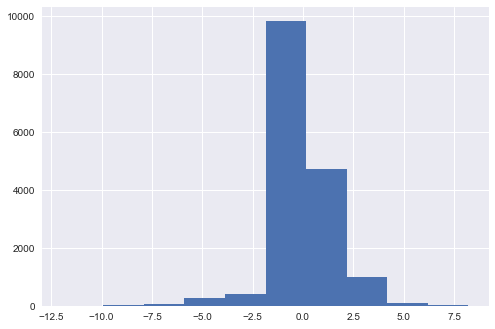

In [72]:
play_df['epa'].hist()

The column appears to be fairly normal.

Finally, let's make sure our percentages are floats.

In [73]:
play_df['Bltz%'] = play_df['Bltz%'].astype(float, errors = 'raise')
play_df['Hrry%'] = play_df['Hrry%'].astype(float, errors = 'raise')
play_df['QBKD%'] = play_df['QBKD%'].astype(float, errors = 'raise')
play_df['Prss%'] = play_df['Prss%'].astype(float, errors = 'raise')
play_df['Drop%'] = play_df['Drop%'].astype(float, errors = 'raise')
play_df['Bad%'] = play_df['Bad%'].astype(float, errors = 'raise')
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16433 entries, 0 to 18310
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   quarter                 16433 non-null  float64
 1   down                    16433 non-null  float64
 2   yardsToGo               16433 non-null  float64
 3   offteam                 16433 non-null  object 
 4   offenseFormation        16433 non-null  object 
 5   offpersonnel            16433 non-null  object 
 6   defendersInTheBox       16433 non-null  float64
 7   numberOfPassRushers     16433 non-null  float64
 8   typeDropback            16433 non-null  object 
 9   absoluteYardlineNumber  16433 non-null  float64
 10  passResult              16433 non-null  object 
 11  offensePlayResult       16433 non-null  float64
 12  epa                     16433 non-null  float64
 13  defteam                 16433 non-null  object 
 14  DADOT                   16433 non-null

## EDA Visualizations

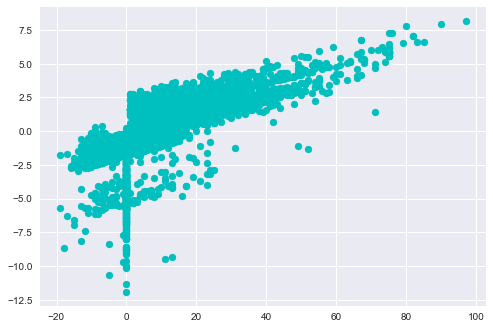

In [74]:
 plt.scatter(play_df['offensePlayResult'], play_df['epa'], marker='o', color='c')

<Figure size 1440x1152 with 0 Axes>

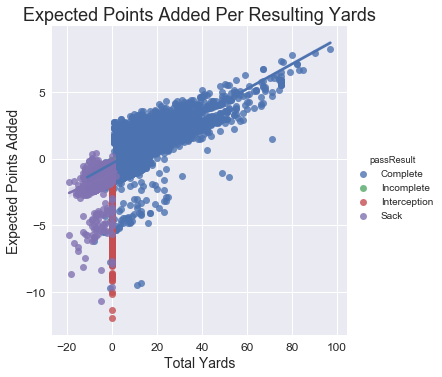

In [75]:
plt.figure(figsize=(20,16))
sns.lmplot(x='offensePlayResult', y='epa', hue='passResult', data=play_df)
plt.title('Expected Points Added Per Resulting Yards', fontsize=18)
plt.xlabel('Total Yards', fontsize=14)
plt.ylabel('Expected Points Added', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/epa_per_yds.png')
plt.show();

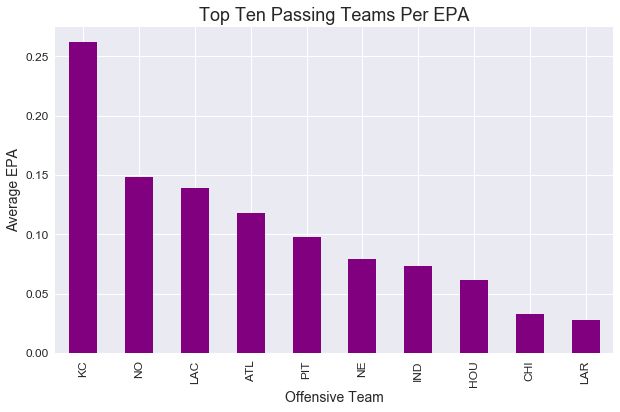

In [76]:
plt.figure(figsize=(10,6))
play_df.groupby('offteam')['epa'].mean().sort_values(ascending = False)[:10].plot(kind='bar', color='purple')
plt.title('Top Ten Passing Teams Per EPA', fontsize=18)
plt.xlabel('Offensive Team', fontsize=14)
plt.ylabel('Average EPA', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/top_passing_teams.png')
plt.show();

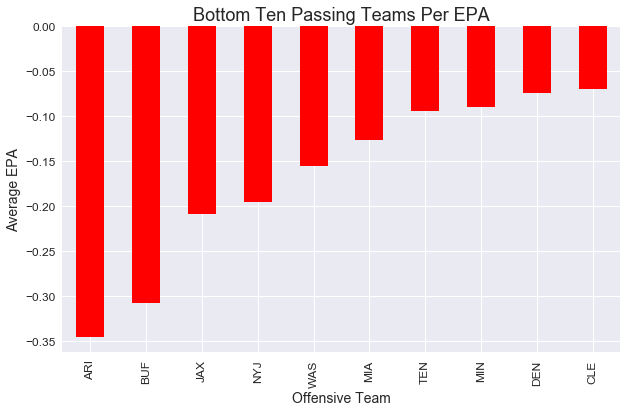

In [77]:
plt.figure(figsize=(10,6))
play_df.groupby('offteam')['epa'].mean().sort_values(ascending = True)[:10].plot(kind='bar', color='red')
plt.title('Bottom Ten Passing Teams Per EPA', fontsize=18)
plt.xlabel('Offensive Team', fontsize=14)
plt.ylabel('Average EPA', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/worst_passing_teams.png')
plt.show();

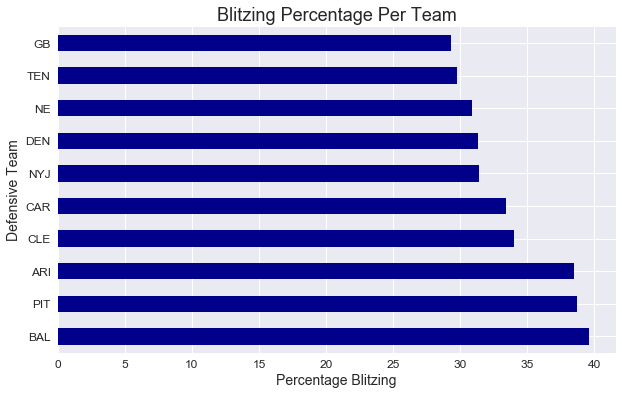

In [78]:
plt.figure(figsize=(10,6))
play_df.groupby('defteam')['Bltz%'].mean().sort_values(ascending = False)[:10].plot(kind='barh', color='darkblue')
plt.title('Blitzing Percentage Per Team', fontsize=18)
plt.xlabel('Percentage Blitzing', fontsize=14)
plt.ylabel('Defensive Team', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/top_blizing_teams.png')
plt.show();

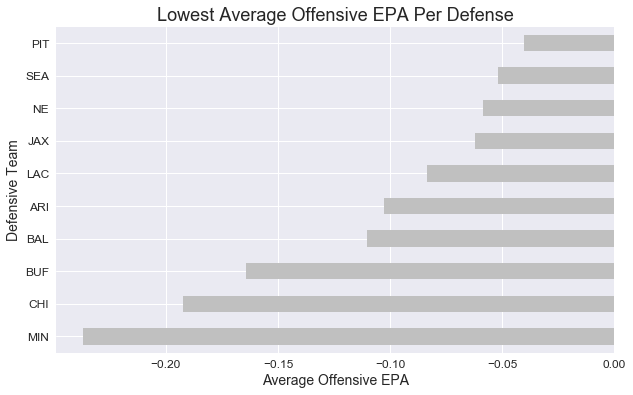

In [79]:
plt.figure(figsize=(10,6))
play_df.groupby('defteam')['epa'].mean().sort_values(ascending = True)[:10].plot(kind='barh', color='silver')
plt.title('Lowest Average Offensive EPA Per Defense', fontsize=18)
plt.xlabel('Average Offensive EPA', fontsize=14)
plt.ylabel('Defensive Team', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/lowest_epa_per_defense.png')
plt.show();

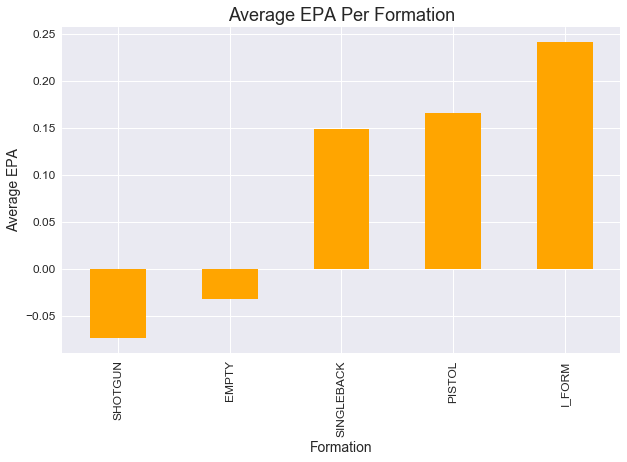

In [80]:
plt.figure(figsize=(10,6))
play_df.groupby('offenseFormation')['epa'].mean().sort_values(ascending = True)[:10].plot(kind='bar', color='orange')
plt.title('Average EPA Per Formation', fontsize=18)
plt.xlabel('Formation', fontsize=14)
plt.ylabel('Average EPA', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/average_epa_per_formation.png')
plt.show();

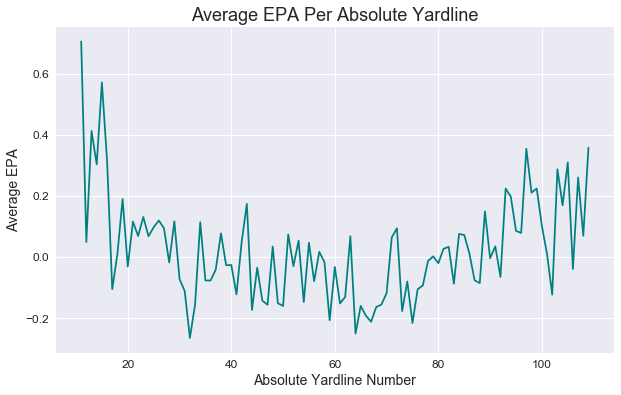

In [81]:
plt.figure(figsize=(10,6))
play_df.groupby('absoluteYardlineNumber')['epa'].mean().plot(kind='line', color='teal')
plt.title('Average EPA Per Absolute Yardline', fontsize=18)
plt.xlabel('Absolute Yardline Number', fontsize=14)
plt.ylabel('Average EPA', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./images/average_epa_per_ydline.png')
plt.show();

## Modeling - Random Forest Regression

Our model is only for offensive teams so we can drop defteam.

In [82]:
play_df = play_df.drop(['defteam'], axis=1)
play_df.head()

,quarter,down,yardsToGo,offteam,offenseFormation,offpersonnel,defendersInTheBox,numberOfPassRushers,typeDropback,absoluteYardlineNumber,passResult,offensePlayResult,epa,DADOT,Bltz%,Hrry%,QBKD%,Prss%,IAY/PA,CAY/Cmp,CAY/PA,YAC/Cmp,Drop%,Bad%,hometeam,scorediff,first_down,defcoverage
0,1.0,3.0,3.0,ATL,EMPTY,01,5.0,4.0,TRADITIONAL,34.0,Complete,9.0,2.116792,9.1,33.4,11.5,4.7,21.6,8.6,6.6,4.5,4.3,6.2,13.5,1,-3.0,1,Nickel
1,1.0,2.0,10.0,ATL,SHOTGUN,11,7.0,3.0,TRADITIONAL,43.0,Complete,9.0,-0.331423,9.1,33.4,11.5,4.7,21.6,8.6,6.6,4.5,4.3,6.2,13.5,1,-3.0,0,Nickel
2,1.0,2.0,8.0,ATL,SINGLEBACK,12,8.0,4.0,DESIGNED_ROLLOUT_RIGHT,81.0,Complete,7.0,-0.023399,9.1,33.4,11.5,4.7,21.6,8.6,6.6,4.5,4.3,6.2,13.5,1,-3.0,0,Base
3,1.0,1.0,10.0,ATL,SINGLEBACK,12,8.0,6.0,TRADITIONAL,35.0,Complete,7.0,-0.063731,9.1,33.4,11.5,4.7,21.6,8.6,6.6,4.5,4.3,6.2,13.5,1,0.0,0,Base
4,1.0,2.0,3.0,ATL,SINGLEBACK,12,8.0,4.0,TRADITIONAL,42.0,Incomplete,0.0,-0.923347,9.1,33.4,11.5,4.7,21.6,8.6,6.6,4.5,4.3,6.2,13.5,1,0.0,0,Base


Next, let's create dummies for the categorical variables.

In [83]:
off_team = pd.get_dummies(data=play_df['offteam'], prefix='team', drop_first=False)
formation = pd.get_dummies(data=play_df['offenseFormation'], prefix='form', drop_first=False)
personnel = pd.get_dummies(data=play_df['offpersonnel'], prefix='per', drop_first=False)
dropback_type = pd.get_dummies(data=play_df['typeDropback'], prefix='drop', drop_first=False)
play_result = pd.get_dummies(data=play_df['passResult'], prefix='play', drop_first=False)
def_coverage = pd.get_dummies(data=play_df['defcoverage'], prefix='cov', drop_first=False)

In [84]:
play_df = play_df.drop(['offteam', 'offenseFormation', 'offpersonnel', 'typeDropback', 'passResult', 'defcoverage'], 
                       axis=1)
play_df = pd.concat([play_df, off_team, formation, personnel, dropback_type, play_result, def_coverage], axis=1)
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16433 entries, 0 to 18310
Data columns (total 90 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   quarter                      16433 non-null  float64
 1   down                         16433 non-null  float64
 2   yardsToGo                    16433 non-null  float64
 3   defendersInTheBox            16433 non-null  float64
 4   numberOfPassRushers          16433 non-null  float64
 5   absoluteYardlineNumber       16433 non-null  float64
 6   offensePlayResult            16433 non-null  float64
 7   epa                          16433 non-null  float64
 8   DADOT                        16433 non-null  float64
 9   Bltz%                        16433 non-null  float64
 10  Hrry%                        16433 non-null  float64
 11  QBKD%                        16433 non-null  float64
 12  Prss%                        16433 non-null  float64
 13  IAY/PA          

Now, let's create the first model.

### Model 1

In [85]:
#import libraries for modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from decimal import *
import math

In [86]:
#create numpy arrays for predictors and target variables 
y = play_df['epa'].values
X = play_df.drop(['epa'], axis=1).values

print(X.shape)
print(y.shape)

(16433, 89)
(16433,)


In [87]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [88]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13146, 89) (13146,) (3287, 89) (3287,)


In [89]:
#import the regressor and fit the model
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
# use the model to predict y values for the test and train data
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [91]:
pred_train_df = pd.DataFrame({'Real Values':y_train.reshape(-1), 'Predicted Values':y_pred_train.reshape(-1)})
pred_train_df.head()

,Real Values,Predicted Values
0,3.350265,3.403474
1,0.073525,0.074474
2,2.376151,2.235593
3,-0.528785,-0.504317
4,0.774875,0.803253


In [92]:
pred_test_df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred_test.reshape(-1)})
pred_test_df.head()

,Real Values,Predicted Values
0,-0.455928,-0.457898
1,-0.374842,-0.636219
2,-0.777127,-0.932571
3,-0.525079,-0.422493
4,-0.925620,-0.756533


In [93]:
root_train_mse = np.mean(y_train-y_pred_train)
root_test_mse = np.mean(y_test-y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error Train:, {round(root_train_mse,5)}')
print(f'Root Mean Squared Error Test:, {round(root_test_mse,5)}')
print(f'R-Squared Train = {round(train_r2,5)}')
print(f'R-Squared Test = {round(test_r2,5)}')

Root Mean Squared Error Train:, 0.00366
Root Mean Squared Error Test:, 0.02318
R-Squared Train = 0.97738
R-Squared Test = 0.86333


In [94]:
root_diff = root_test_mse - root_train_mse
r2_diff = train_r2 - test_r2

print(f'Root Mean Squared Error Difference: {round(root_diff,5)}')
print(f'R-Squared Difference = {round(r2_diff,5)}')

Root Mean Squared Error Difference: 0.01952
R-Squared Difference = 0.11406


In [95]:
top_feats = rf.feature_importances_
top_feats

array([5.77542537e-03, 7.31371613e-02, 7.03285237e-03, 7.52357627e-03,
       3.72864737e-03, 2.97106947e-02, 1.11065200e-01, 7.16642827e-03,
       7.04536423e-03, 5.94014369e-03, 4.81499298e-03, 4.82956315e-03,
       3.18677905e-03, 2.54287588e-03, 2.84497657e-03, 3.98887015e-03,
       3.97591647e-03, 5.51136234e-03, 1.11425421e-03, 8.77298879e-03,
       5.21199737e-01, 3.50986431e-04, 4.22839559e-04, 2.79327296e-04,
       5.47271297e-04, 4.11934292e-04, 2.21153065e-04, 6.85119679e-04,
       2.40404954e-04, 6.06620263e-04, 4.12919096e-04, 2.57594762e-04,
       5.40559115e-04, 5.35419909e-04, 1.08622070e-03, 3.75685151e-04,
       2.30616134e-04, 2.43834407e-04, 2.58253308e-04, 3.90927969e-04,
       8.05050000e-04, 5.87621282e-04, 4.14039702e-04, 9.97672712e-04,
       8.20937789e-04, 2.93541720e-04, 1.16474133e-03, 6.91220381e-04,
       8.57612936e-04, 6.88642299e-04, 1.18144217e-04, 6.34479049e-04,
       3.99873804e-04, 8.37986023e-04, 1.90590722e-04, 3.33346594e-04,
      

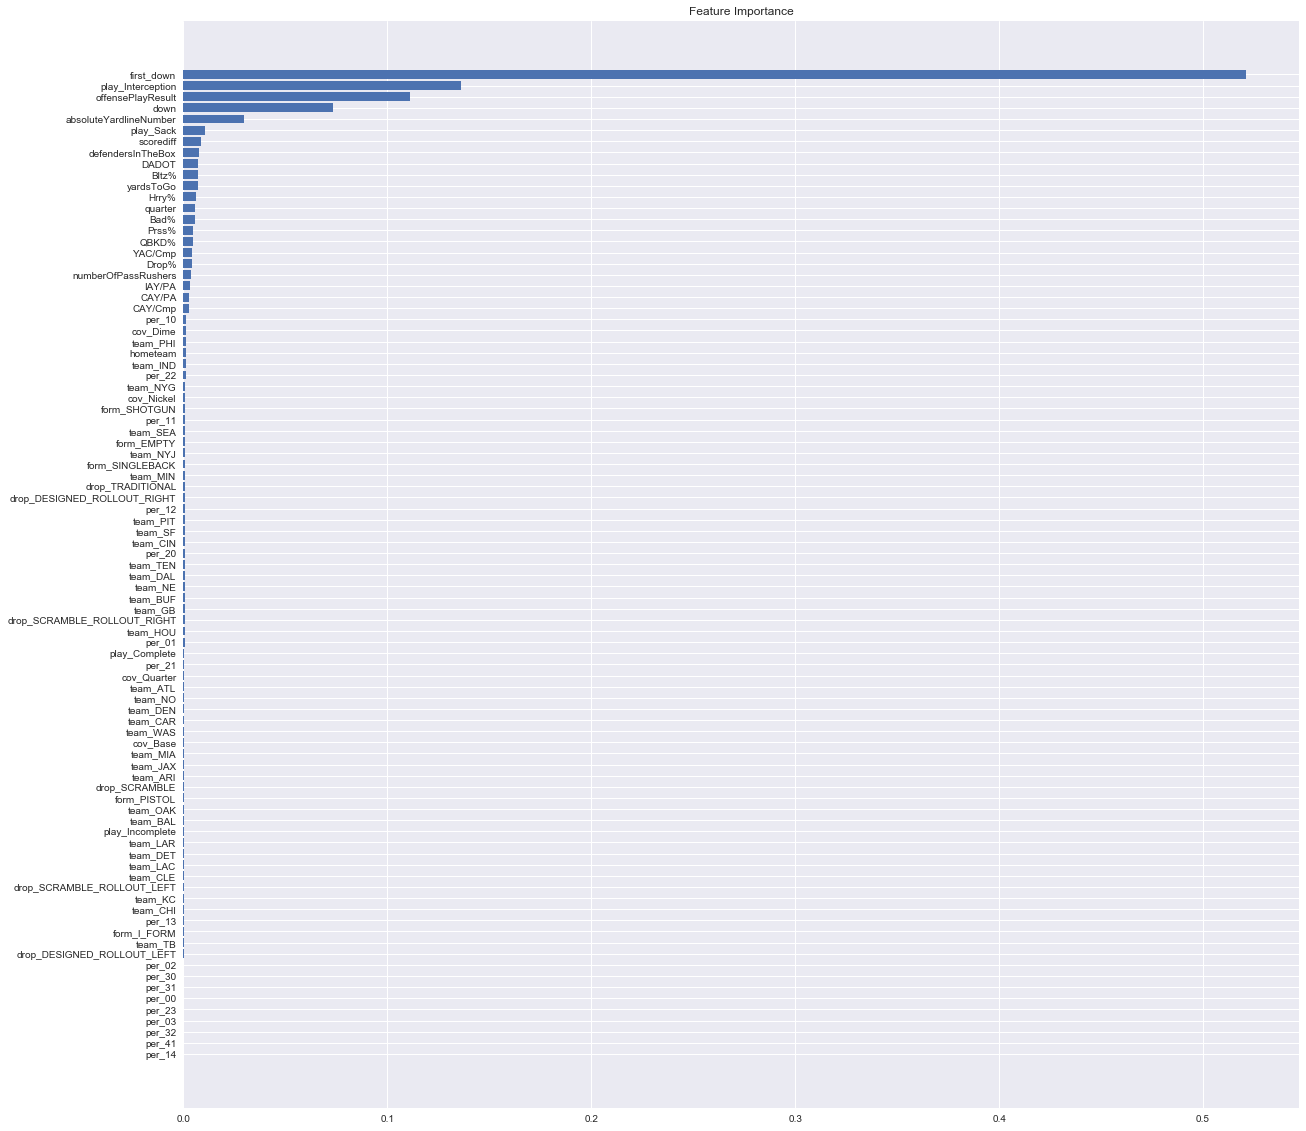

In [96]:
# creating list of column names
col_names = play_df.drop(['epa'], axis=1).columns
feat_names= list(col_names)

# Sort feature importances in ascending order
indices = np.argsort(top_feats)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20,20))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

### Model 2

Not every feature was important to the first model. Let's try dropping the features that have no importance to see if it improves the model's performance.

In [97]:
play_df = play_df.drop(['per_02', 'per_00', 'per_30', 'per_31', 'per_23', 'per_03', 'per_32', 'per_14', 'per_41'], 
                      axis=1)

In [98]:
#create numpy arrays for predictors and target variables 
y = play_df['epa'].values
X = play_df.drop(['epa'], axis=1).values

print(X.shape)
print(y.shape)

(16433, 80)
(16433,)


In [99]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [100]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13146, 80) (13146,) (3287, 80) (3287,)


In [101]:
#import the regressor and fit the model
rf2 = RandomForestRegressor(n_estimators = 100)
rf2.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
#get the predictions
y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

In [103]:
#calcute the metrics
root_train_mse = np.mean(y_train-y_pred_train)
root_test_mse = np.mean(y_test-y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error Train:, {round(root_train_mse,5)}')
print(f'Root Mean Squared Error Test:, {round(root_test_mse,5)}')
print(f'R-Squared Train = {round(train_r2,5)}')
print(f'R-Squared Test = {round(test_r2,5)}')

Root Mean Squared Error Train:, 0.00345
Root Mean Squared Error Test:, 0.02356
R-Squared Train = 0.97767
R-Squared Test = 0.86249


In [104]:
root_diff = root_test_mse - root_train_mse
r2_diff = train_r2 - test_r2

print(f'Root Mean Squared Error Difference: {round(root_diff,5)}')
print(f'R-Squared Difference = {round(r2_diff,5)}')

Root Mean Squared Error Difference: 0.02011
R-Squared Difference = 0.11518


In [105]:
#find feature immportances
top_feats = rf2.feature_importances_
top_feats

array([5.92297002e-03, 7.31124512e-02, 6.84819902e-03, 7.49558989e-03,
       4.04501550e-03, 2.93635827e-02, 1.11085454e-01, 6.66478524e-03,
       7.51008349e-03, 6.03873773e-03, 4.74824893e-03, 5.17176604e-03,
       3.13902689e-03, 2.59979937e-03, 2.77051087e-03, 4.32701608e-03,
       4.00893653e-03, 5.77885213e-03, 1.13889916e-03, 8.49414768e-03,
       5.20333262e-01, 2.27741771e-04, 6.46580640e-04, 2.82207221e-04,
       4.78587494e-04, 3.40629902e-04, 2.03757163e-04, 6.09210222e-04,
       2.09453561e-04, 6.09372604e-04, 3.47476368e-04, 3.42708644e-04,
       4.84137156e-04, 5.00653450e-04, 9.35429185e-04, 5.11556091e-04,
       2.21911088e-04, 2.45031295e-04, 2.36773485e-04, 4.49639043e-04,
       8.06055629e-04, 6.31770701e-04, 3.27547132e-04, 8.23363961e-04,
       7.94008929e-04, 3.11600038e-04, 1.09819177e-03, 4.59437181e-04,
       9.31195198e-04, 5.70766369e-04, 1.23655116e-04, 6.01518241e-04,
       5.51003668e-04, 7.84223295e-04, 2.15454388e-04, 3.65438108e-04,
      

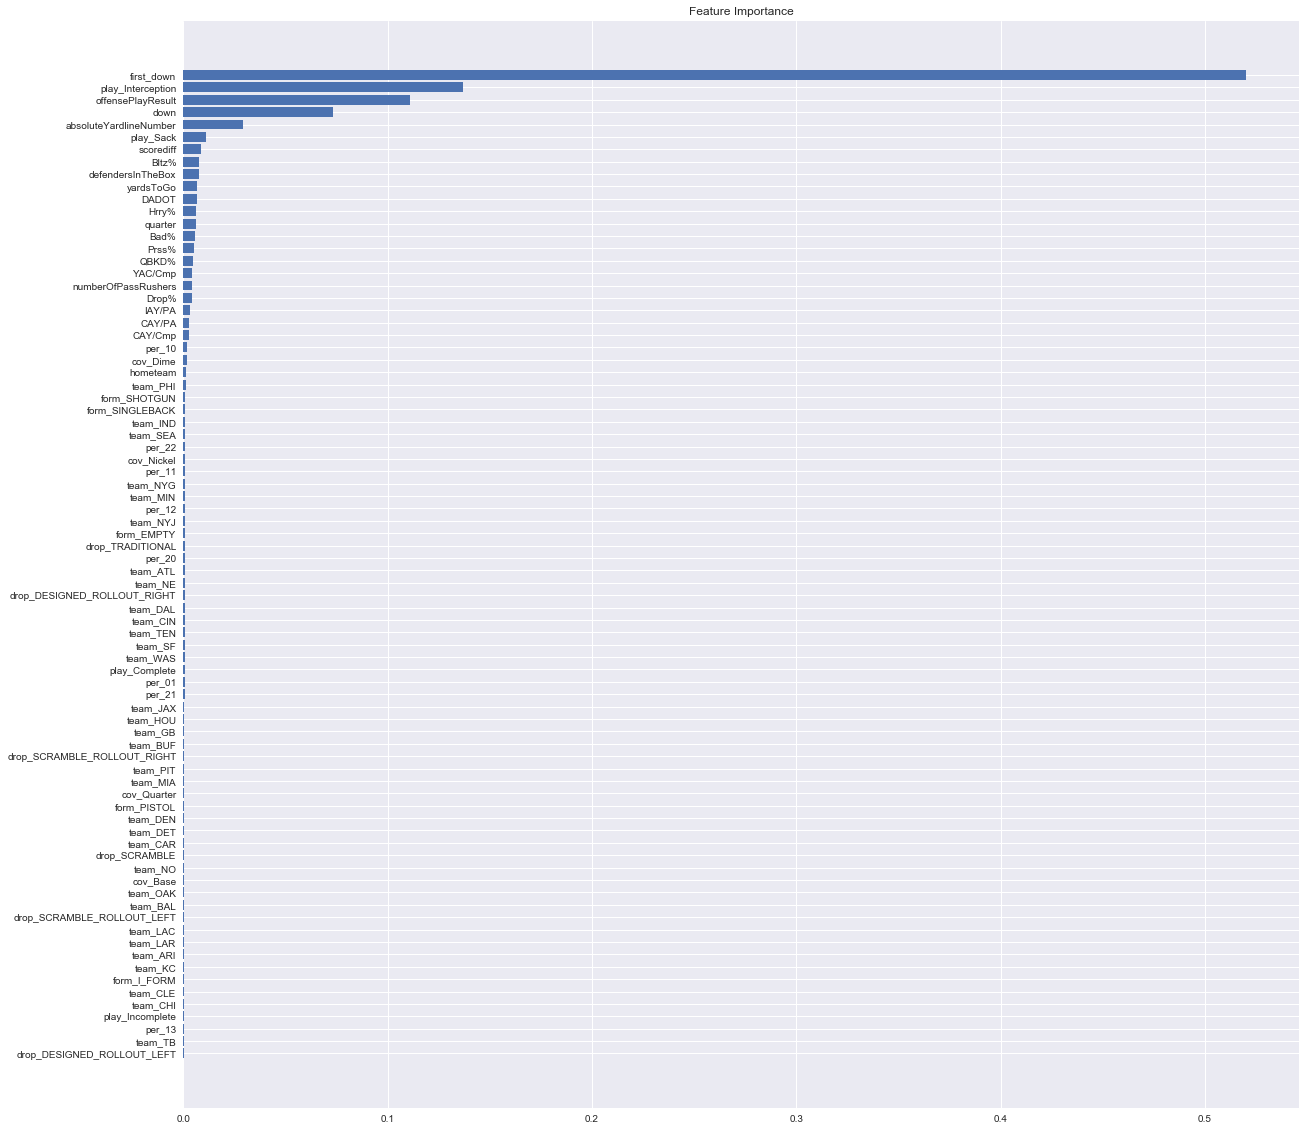

In [106]:
# creating list of column names
col_names = play_df.drop(['epa'], axis=1).columns
feat_names= list(col_names)

# Sort feature importances in ascending order
indices = np.argsort(top_feats)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20,20))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

Every feature is important to the model.

### Model 3 w/ Grid Search

Let's see if we can improve the fit of the model using Grid Search.

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
rf3 = RandomForestRegressor()

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf_grid_search = GridSearchCV(estimator = rf3, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [109]:
rf_grid_search.fit(X_train, y_train);
print(rf_grid_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 15}


In [110]:
rf3 = rf3.fit(X_train, y_train)
y_pred_train = rf3.predict(X_train)
y_pred_test = rf3.predict(X_test)

In [111]:
root_train_mse = np.mean(y_train-y_pred_train)
root_test_mse = np.mean(y_test-y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Root Mean Squared Error Train:, {round(root_train_mse,5)}')
print(f'Root Mean Squared Error Test:, {round(root_test_mse,5)}')
print(f'R-Squared Train = {round(train_r2,5)}')
print(f'R-Squared Test = {round(test_r2,5)}')

Root Mean Squared Error Train:, 0.00264
Root Mean Squared Error Test:, 0.02223
R-Squared Train = 0.97759
R-Squared Test = 0.86266


In [112]:
root_diff = root_test_mse - root_train_mse
r2_diff = train_r2 - test_r2

print(f'Root Mean Squared Error Difference: {round(root_diff,5)}')
print(f'R-Squared Difference = {round(r2_diff,5)}')

Root Mean Squared Error Difference: 0.01959
R-Squared Difference = 0.11493


In [113]:
top_feats = rf3.feature_importances_
top_feats

array([5.75395189e-03, 7.32173425e-02, 6.70075454e-03, 7.39575238e-03,
       3.78646983e-03, 2.96759125e-02, 1.11928840e-01, 6.75159250e-03,
       7.29959650e-03, 5.88772646e-03, 4.90612900e-03, 5.43732571e-03,
       3.33634725e-03, 2.50335237e-03, 2.52719977e-03, 3.86328751e-03,
       3.69386449e-03, 5.77851240e-03, 1.19181298e-03, 8.43080564e-03,
       5.21703184e-01, 3.05484414e-04, 4.57402434e-04, 3.00824908e-04,
       4.08606969e-04, 4.06951561e-04, 2.29012637e-04, 6.88520635e-04,
       2.51983601e-04, 5.73002500e-04, 4.41547783e-04, 3.00655104e-04,
       4.26466993e-04, 5.50046836e-04, 1.21529237e-03, 5.31742788e-04,
       2.22336753e-04, 3.66499939e-04, 2.97902863e-04, 4.42795102e-04,
       8.35775217e-04, 5.68123282e-04, 3.42162548e-04, 8.84744366e-04,
       7.51357586e-04, 3.04142644e-04, 9.86869722e-04, 4.61599287e-04,
       8.92691382e-04, 5.09817337e-04, 1.48118146e-04, 6.61303877e-04,
       5.25175613e-04, 7.86193246e-04, 1.99733471e-04, 3.17270880e-04,
      

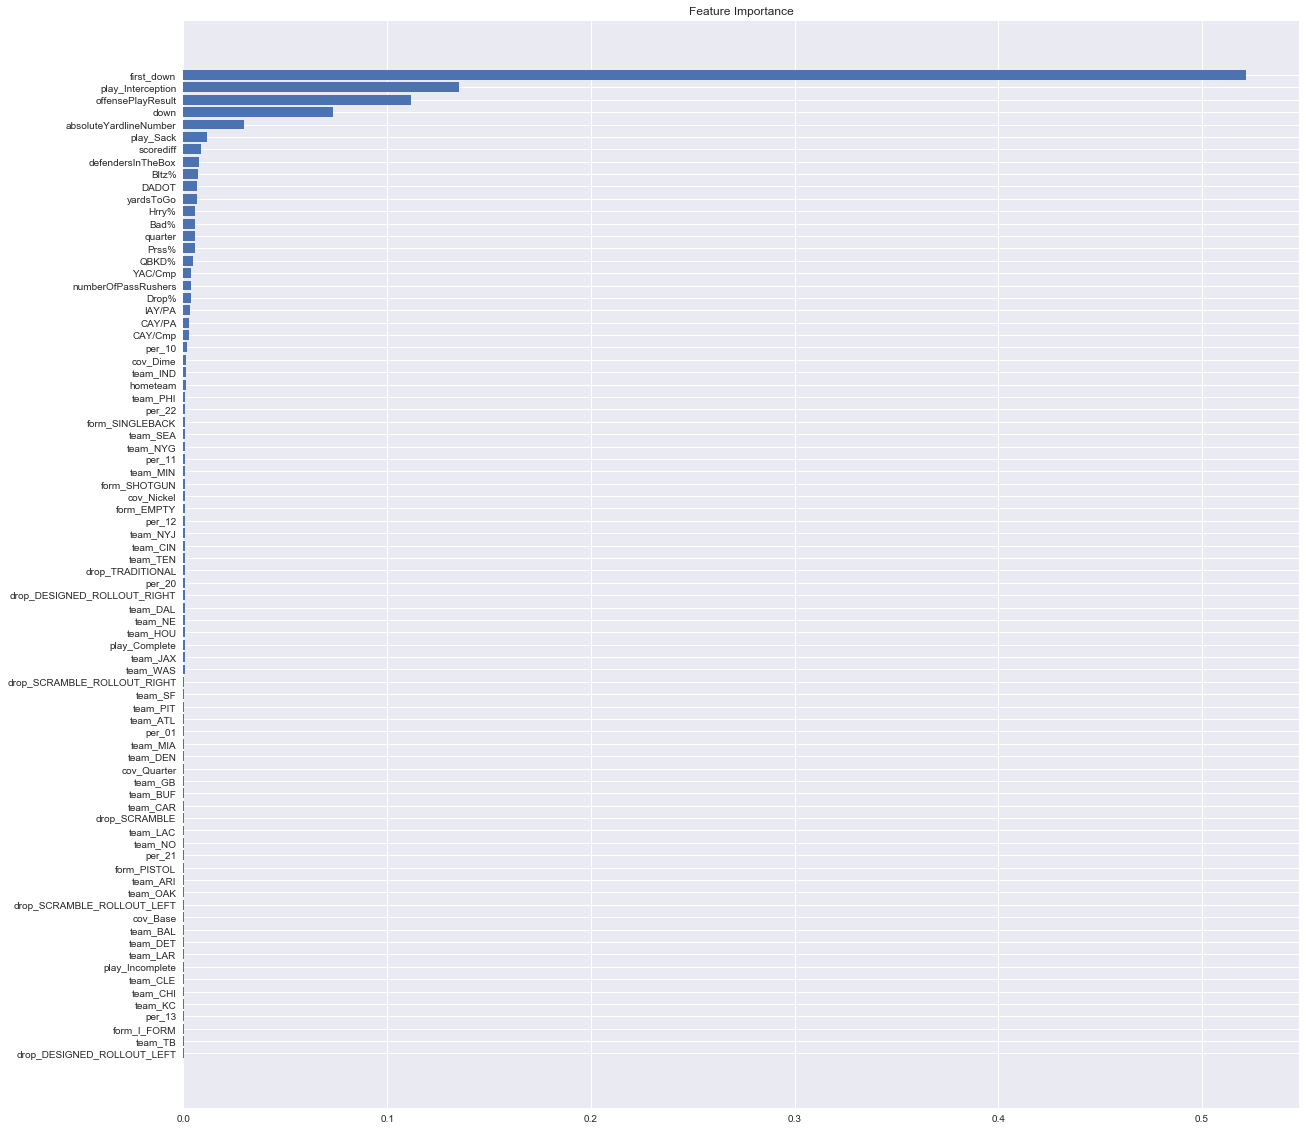

In [114]:
# creating list of column names
col_names = play_df.drop(['epa'], axis=1).columns
feat_names= list(col_names)

# Sort feature importances in ascending order
indices = np.argsort(top_feats)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [feat_names[i] for i in indices]

# Create plot
plt.figure(figsize=(20,20))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.barh(range(X_train.shape[1]), top_feats[indices])

# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

Every feature is still important to the model.

## Conclusion

The r squared values show that all of the models perform similarly. Looking at the differences in the test and train root mean squared errors, model 1 underfitting and model 3 is overfitting. Model 2 is the best fit for this dataset.

As expected, first downs, interceptions, play result, and down have the greatest impact on the model. Additionally, absolute yardline, sacks, score differential, and blitz percentage are important factors.

Going foward, we recommend that teams should make use of running formations to deceive the defense more often, attempt a big passing play earlier in a drive, take advantage of teams that like to blitz.